## Operation Increase Sales and Profit (OISP) Data Analysis

### Problem Statement

A multinational retail company is launching an initiative named **'Operation Increase Sales and Profit' (OISP)** aimed at boosting sales and maximizing profit. However, before implementing any strategies, the management team seeks to gain insights from their existing sales data. As the Data Analyst, you are tasked with analyzing the four-year daily sales records provided in the dataset **superstore_data.csv**.

### Task

The objective is to analyze the data and provide actionable insights to the management team on how to increase sales and profit as envisioned in the campaign. The analysis should follow the CRISP-DM (Cross Industry Standard Process for Data Mining) methodology, asking relevant questions and providing answers based on the data. Management expects statistical summaries of key variables, visualizations, and a comprehensive report on findings and recommendations.

### Content/Analytical Steps

1. **Business Understanding**
   - Understand the goals and objectives of the 'Operation Increase Sales and Profit' campaign.
   - Define key performance indicators (KPIs) related to sales and profit.

2. **Data Understanding**
   - Explore the provided dataset (superstore_data.csv).
   - Identify key variables such as sales, profit, unit price, shipping cost, discounts, and shipping interval.
   - Assess data quality, missing values, and outliers.

3. **Data Preparation**
   - Clean the data by handling missing values and outliers if necessary.
   - Format variables appropriately for analysis.
   - Create derived variables if needed.

4. **Exploratory Data Analysis (EDA)**
   - Perform statistical summaries and visualizations of key variables.
   - Analyze trends, patterns, and correlations among variables.
   - Identify factors influencing sales and profit.

5. **Insights and Recommendations**
   - Draw insights from the analysis regarding sales and profit drivers.
   - Provide recommendations to the management team based on the findings.
   - Propose actionable strategies to increase sales and profit.









### IMPORTING PACKAGES

In [90]:
##Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)


In [91]:
#Reading the data
#NB: Make sure you the data in your current working directory

data = pd.read_csv('superstore data.csv',parse_dates = ['Order Date','Ship Date'],encoding = 'latin1')

In [92]:
ls


 Volume in drive C has no label.
 Volume Serial Number is 3CF6-C7AB

 Directory of C:\Users\agnes\OneDrive\Documents\GIZ Women in AI\Assignments

05/19/2024  03:41 PM    <DIR>          .
05/19/2024  03:41 PM    <DIR>          ..
05/19/2024  02:28 PM    <DIR>          .ipynb_checkpoints
05/17/2024  10:30 PM         4,457,919 Entrepreneurship and Adaptability.pptx
05/16/2024  10:06 AM         4,462,189 Entrepreneurship by Discover Template[1].pptx
05/13/2024  09:46 PM           663,436 FoodHub Data_Analysis.ipynb
03/21/2024  11:09 AM           123,933 foodhub_order.csv
05/19/2024  03:41 PM           666,470 Joelle's Copy Mid-Course Project (Data Analysis Project).ipynb
04/03/2024  08:56 AM        35,502,620 Joelles Excel Assignment.xlsx
05/18/2024  11:37 AM           455,560 Malignant Melanoma Patient Data.ipynb
03/27/2024  02:15 PM             5,127 melanoma.csv
05/19/2024  02:56 PM           833,690 Mid-Course Project (Data Analysis Project 1).ipynb
05/19/2024  01:55 PM         2,426,3

### DATA CLEANING

#### Sanity Checks

In [93]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High


In [94]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,94533.0,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,Morocco,NaN,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,NaN,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,Mexico,NaN,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,United States,80538.0,US,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


In [95]:
for col in data.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
City
State
Country
Postal Code
Market
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Shipping Cost
Order Priority


In [96]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [97]:
# there are 41296 missing values in postal code

postal=data["Postal Code"].isnull().value_counts()
postal


Postal Code
True     41296
False     9994
Name: count, dtype: int64

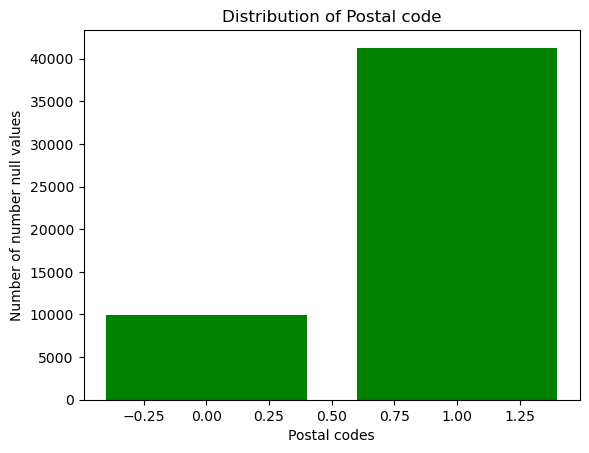

In [98]:
fig, ax=plt.subplots()

ax.bar(x=postal.index, height=postal, data=data, color="green")

ax.set_xlabel("Postal codes")
ax.set_ylabel("Number of number null values")
ax.set_title("Distribution of Postal code")
plt.show()


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [100]:
data.shape

(51290, 24)

In [101]:
data["Sub-Category"].value_counts()

Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64

In [102]:
data["Product Name"].value_counts()

Product Name
Staples                                                                      227
Cardinal Index Tab, Clear                                                     92
Eldon File Cart, Single Width                                                 90
Rogers File Cart, Single Width                                                84
Ibico Index Tab, Clear                                                        83
                                                                            ... 
Okidata B401 Printer                                                           1
Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate      1
Xerox WorkCentre 6505DN Laser Multifunction Printer                            1
Barricks Round Table, Rectangular                                              1
Multimedia Mailers                                                             1
Name: count, Length: 3788, dtype: int64

In [103]:
#Changing int variables to categoricals

data["Row ID"]=data["Row ID"].astype(str)
data["Postal Code"]=data["Postal Code"].astype(str)

In [104]:
(data["Discount"]<=20).value_counts().reset_index()




,Discount,count
0,True,51290


In [105]:
(data["Discount"]>=20).value_counts().reset_index()

,Discount,count
0,False,51290


In [106]:
data.describe(include=np.number)

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915
std,487.565361,2.278766,0.212280,174.340972,57.296804
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


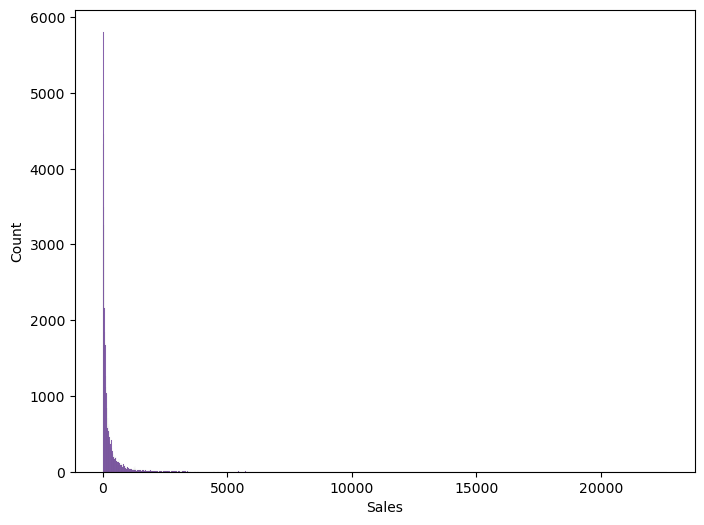

In [107]:
#distribution of sales
plt.figure(figsize=(8, 6))

sns.histplot(x=data["Sales"], color="rebeccapurple")

plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

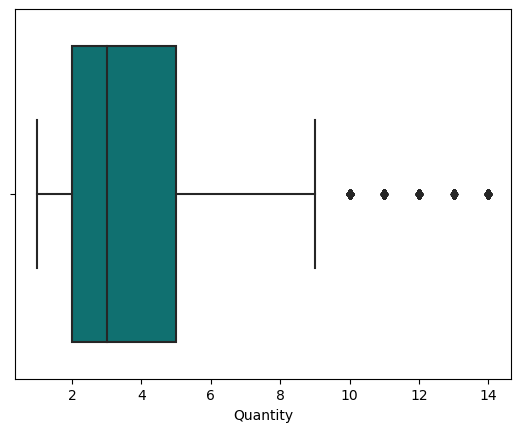

In [27]:
#distribution of Quantity

sns.boxplot(x="Quantity", data=data, color="Teal")
plt.plot


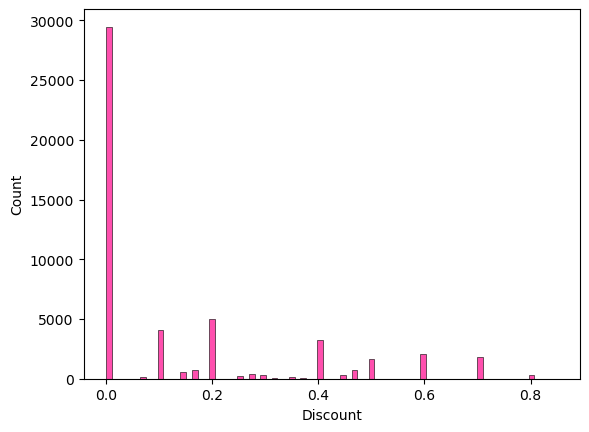

In [108]:
sns.histplot(x="Discount", data=data, color="deeppink")
plt.show()

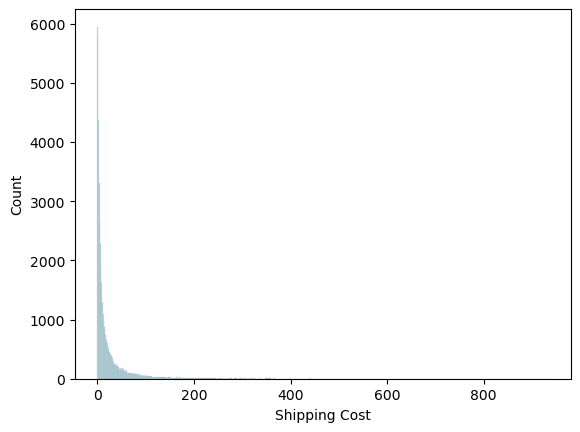

In [109]:
sns.histplot(x="Shipping Cost", data=data, color="Lightblue")
plt.show()

In [110]:
data["Unit Price"]=(data["Sales"]/data["Quantity"])

data.head(1)



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,nan,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium,204.15


In [111]:
data["Order Date"].value_counts()

Order Date
18-06-2014    135
18-11-2014    127
3/9/2014      126
20-11-2014    118
29-12-2014    116
             ... 
7/7/2013        1
16-01-2011      1
23-09-2012      1
21-07-2013      1
10/11/2013      1
Name: count, Length: 1430, dtype: int64

### Feature Engineering

In [112]:


data['Order Date'] = pd.to_datetime(data['Order Date'],dayfirst=True, format="mixed", infer_datetime_format=True)

#data["Year"]=data["Order Date"].dt.year

In [113]:
data["Order Date"]

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
51285   2014-12-31
51286   2014-12-31
51287   2014-12-31
51288   2014-12-31
51289   2014-12-31
Name: Order Date, Length: 51290, dtype: datetime64[ns]

In [114]:
data["Year"]=data["Order Date"].dt.year

In [115]:
data["Month"]=data["Order Date"].dt.month

In [116]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Year,Month
0,42433,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,nan,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.150,2011,1
1,22253,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,nan,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,40.122,2011,1
2,48883,HU-2011-1220,2011-01-01,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,nan,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.530,2011,1


In [117]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'],dayfirst=True, format="mixed", infer_datetime_format=True)

#data["Year"]=data["Order Date"].dt.year

In [118]:
data["Shipping interval"]=(data["Ship Date"])-(data["Order Date"])



In [119]:
data['Shipping interval']=data['Shipping interval'].astype(str)
data['Shipping interval']=data['Shipping interval'].str.strip('days')

In [120]:
data["Shipping interval"].astype(int)

0        5
1        7
2        4
3        4
4        7
        ..
51285    4
51286    5
51287    2
51288    6
51289    4
Name: Shipping interval, Length: 51290, dtype: int32

In [121]:
data['Year']=data['Order Date'].dt. strftime('%Y') 

In [122]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price,Year,Month,Shipping interval
0,42433,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,nan,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.150,2011,1,5
1,22253,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,nan,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,40.122,2011,1,7
2,48883,HU-2011-1220,2011-01-01,2011-01-05,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,nan,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.530,2011,1,4


### EXPLORATORY ANALYSIS

### Sales and profit per market

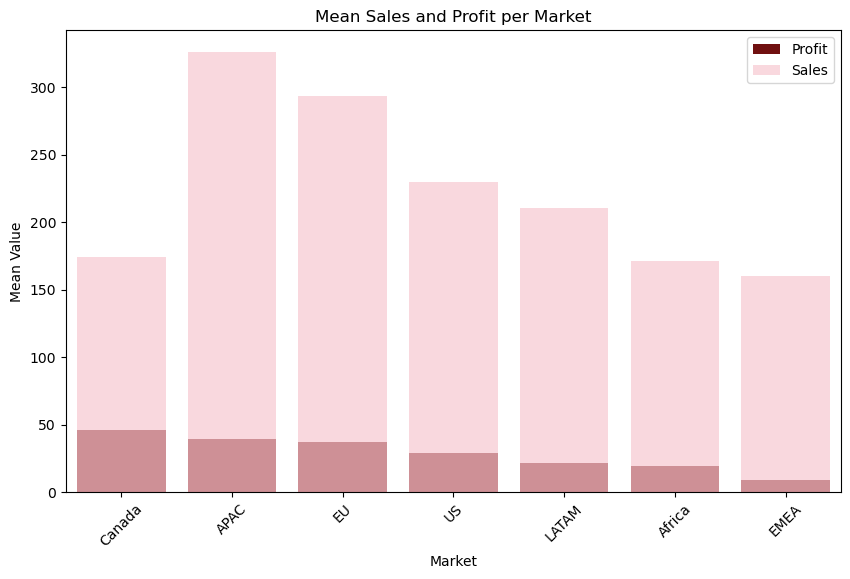

,Profit,Sales
Market,,
Canada,46.4,174.3
APAC,39.6,325.9
EU,37.3,293.8
US,28.7,229.9
LATAM,21.5,210.3
Africa,19.4,170.9
EMEA,8.7,160.3


In [55]:
# Sales and profit per market
groupedmarket_mean=data.groupby("Market")[["Profit", "Sales"]].mean().round(1).sort_values(by="Profit",ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=groupedmarket_mean.index, y=groupedmarket_mean["Profit"], color="maroon", label="Profit")
sns.barplot(x=groupedmarket_mean.index, y=groupedmarket_mean["Sales"], color="pink", alpha=0.7, label="Sales")
plt.title("Mean Sales and Profit per Market")
plt.xlabel("Market")
plt.ylabel("Mean Value")
plt.legend()
plt.xticks(rotation=45)
plt.show()
groupedmarket_mean

Canada has the highest mean Profit among all markets, followed by Market APAC and EU.
Despite Canada having the highest mean Profit, its mean Sales are relatively lower compared to APAC and EU. APAC had the highest sales

### The most profitable Market

In [124]:
#The most profitable Market

groupedmarket_mean[groupedmarket_mean["Profit"]==groupedmarket_mean["Profit"].max()]

,Profit,Sales
Market,,
Canada,46.4,174.3


In [125]:
data[data["Region"]=="Oceania"][["Market","Product Name","Sales","Profit", "Discount"]]

,Market,Product Name,Sales,Profit,Discount
1,APAC,"Acme Trimmer, High Speed",120.366,36.036,0.1
4,APAC,"Eldon Light Bulb, Duo Pack",113.670,37.770,0.1
5,APAC,"Eaton Computer Printout Paper, 8.5 x 11",55.242,15.342,0.1
31,APAC,"Panasonic Receipt Printer, White",214.758,7.158,0.1
46,APAC,"Cisco Signal Booster, Full Size",91.872,-45.948,0.4
...,...,...,...,...,...
51139,APAC,"Advantus Staples, Metal",65.880,7.740,0.0
51178,APAC,"Safco Library with Doors, Mobile",706.158,156.918,0.1
51191,APAC,"Eldon Shelving, Wire Frame",170.964,-18.996,0.1
51197,APAC,"Dania 3-Shelf Cabinet, Pine",171.360,-17.160,0.4


### Month the company recorded more sales

In [126]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

data['Month'] = data['Month'].map(month_mapping)
data['Month'] = data['Month'].astype('category')


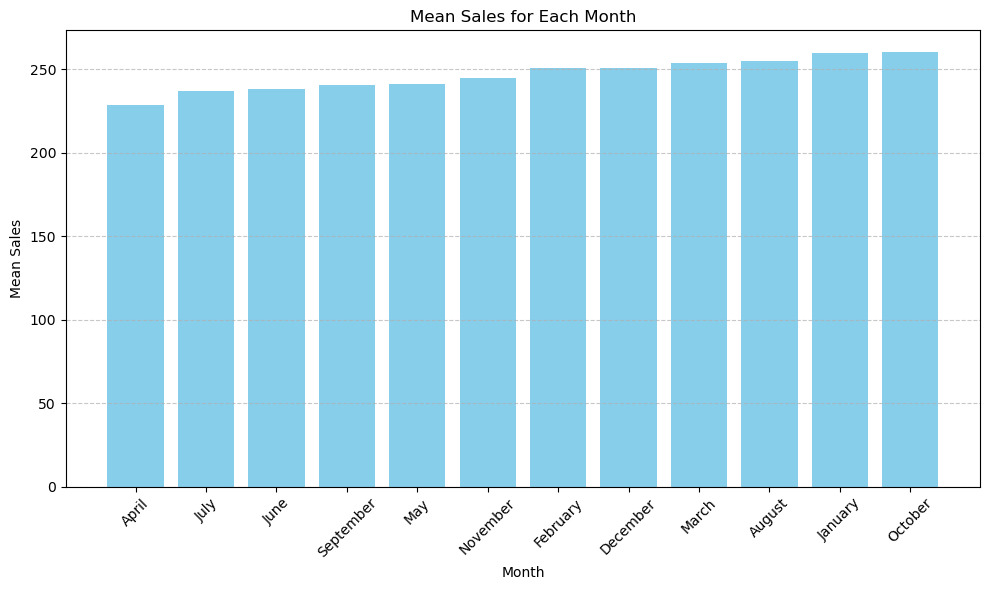

,Sales
Month,
October,260.174696


In [127]:
months=data.groupby("Month")[["Sales"]].mean().sort_values(by="Sales")
months[months["Sales"]==months["Sales"].max()]


plt.figure(figsize=(10, 6))
plt.bar(months.index, months["Sales"], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Mean Sales')
plt.title('Mean Sales for Each Month')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

months[months["Sales"]==months["Sales"].max()]

### Observation

The most profitable month is October with a high score of 260

### Checking the relationship between Shipping cost and Sales

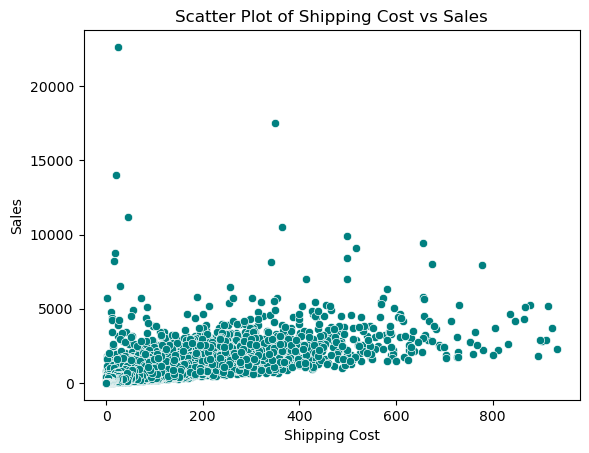

In [128]:
#Shipping cost and sales. is there a relationship

# Scatter plot of Shipping Cost versus Sales
sns.scatterplot(x="Shipping Cost", y="Sales", data=data, color="teal")
plt.title('Scatter Plot of Shipping Cost vs Sales')
plt.xlabel('Shipping Cost')
plt.ylabel('Sales')


plt.show()

In [129]:
# Simple Regression to find relationship between the Shipping cost and Sales

correlation = data['Shipping Cost'].corr(data['Sales'])


print("Correlation between shipping cost and sales:",{correlation})

Correlation between shipping cost and sales: {0.7680728376889517}


### Observation:
From the scatter plot, we can observe that there doesn't seem to be a strong linear relationship between the shipping cost and sales. While there are some points where higher shipping costs are associated with higher sales, there are also instances where higher shipping costs are not correlated with higher sales. 

### The Dominant Product Category in each Market

In [100]:
data.dtypes

Row ID                        object
Order ID                      object
Order Date            datetime64[ns]
Ship Date             datetime64[ns]
Ship Mode                     object
Customer ID                   object
Customer Name                 object
Segment                       object
City                          object
State                         object
Country                       object
Postal Code                   object
Market                        object
Region                        object
Product ID                    object
Category                      object
Sub-Category                  object
Product Name                  object
Sales                        float64
Quantity                       int64
Discount                     float64
Profit                       float64
Shipping Cost                float64
Order Priority                object
Unit Price                   float64
Year                           int32
Month                          int32
S

In [311]:
Dominant=data.groupby("Market")[["Category", "Sub-Category"]].apply(lambda x: x.mode())

Dominant
# data.duplicated(subset=["Market", "Category"])
# counts.groupby('Market').max()

Category Sub-Category
Market                                
APAC   0  Office Supplies       Chairs
Africa 0  Office Supplies          Art
Canada 0  Office Supplies          Art
       1              NaN      Binders
EMEA   0  Office Supplies          Art
EU     0  Office Supplies          Art
LATAM  0  Office Supplies      Binders
US     0  Office Supplies      Binders

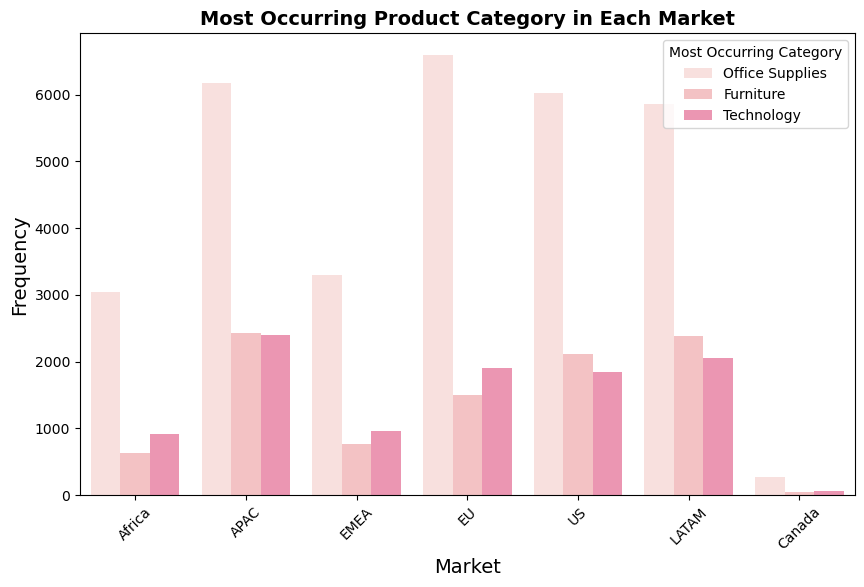

In [138]:
custom_palette = sns.color_palette("RdPu")

# Plot the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Market', hue="Category", palette=custom_palette)
plt.title('Most Occurring Product Category in Each Market', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Market',fontdict={'fontsize': 14,})
plt.ylabel('Frequency',fontdict={'fontsize': 14})
plt.xticks(rotation=45)
plt.legend(title='Most Occurring Category', title_fontsize='10', loc="upper right")
plt.show()

## Observation
* The Dominant Product Category in each Market is office supplies with a Art being the dominant in that category


### City with most orders by given category

In [145]:

# Grouping the data by "City" and counting the number of unique "Order ID" for each city
city_order_counts = data.groupby("City")["Order ID"].nunique()

# Finding the city with the highest number of orders
city_with_most_orders = city_order_counts.idxmax()

# Filtering the data for the city with the most orders
city_data = data[data["City"] == city_with_most_orders]

# Grouping the filtered data by "Category" and counting the number of occurrences of each category
category_counts = city_data["Category"].value_counts()

# Finding the highest ordered category
highest_ordered_category = category_counts.idxmax()

print("City with the most orders:", city_with_most_orders)
print("Highest ordered category in the city:", highest_ordered_category)



city_order_counts = data.groupby("City")["Order ID"].nunique()

# Finding the city with the least number of orders
city_with_least_orders = city_order_counts.idxmin()

# Filtering the data for the city with the least orders
city_data = data[data["City"] == city_with_least_orders]

# Grouping the filtered data by "Category" and counting the number of occurrences of each category
category_counts = city_data["Category"].value_counts()

# Finding the least ordered category
least_ordered_category = category_counts.idxmin()

# Printing the result
print("City with the least orders:", city_with_least_orders)
print("Least ordered category in the city:", least_ordered_category)

City with the most orders: New York City
Highest ordered category in the city: Office Supplies
City with the least orders: Aalen
Least ordered category in the city: Furniture


### Observation
The city with the most order is New York City with a highest ordered category as Office Supplies
Meanwhile Aalen had the least orders and the least ordered category is Furniture

## Observation

* The city with most order by category is Achen. its highest ordered category is Office supplies

## Products making losses

In [307]:
filtered_data = data.groupby("Product Name").filter(lambda x: x["Profit"].sum() <= 0)
grouped_losses=filtered_data.groupby("Product Name")["Profit"].sum().reset_index().sort_values(by="Profit",ascending=True)

grouped_losses.head()

,Product Name,Profit
205,Cubify CubeX 3D Printer Double Head Print,-8879.9704
429,Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
452,"Motorola Smart Phone, Cordless",-4447.0380
206,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
118,"Bevis Round Table, Adjustable Height",-3649.8940


## Observation

The products making the highest losses are; Cubify CubeX 3D Printer Double Head Print making a loss of -8879.9704 dollars,Lexmark MX611dhe Monochrome Laser Printer making a loss of -4589.9730 dollars ,Motorola Smart Phone, Cordless making a loss of -4447.0380 dollars, Cubify CubeX 3D Printer Triple Head Print making a loss of -3839.990 dollars, Bevis Round Table, Adjustable Heightmaking a loss of -3649.8940 dollars.


### Segment with the highest profit

In [305]:
filtered_data = data.groupby("Segment").filter(lambda x: x["Profit"].sum() >= 0)
filtered_data.groupby("Segment")["Profit"].sum().reset_index().sort_values(by="Profit", ascending=False)


,Segment,Profit
0,Consumer,749239.78206
1,Corporate,441208.32866
2,Home Office,277009.18056


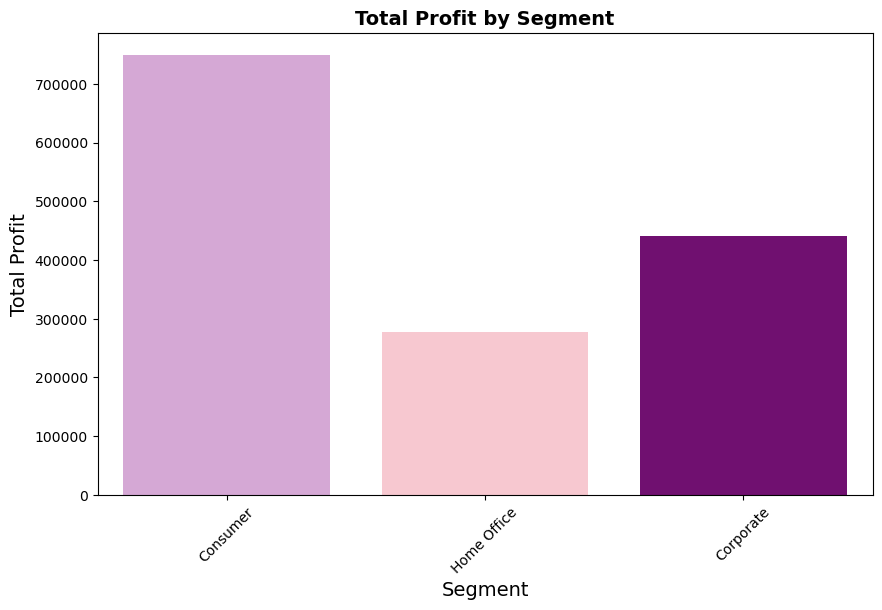

In [306]:

plt.figure(figsize=(10, 6))

sns.barplot(x="Segment", y="Profit", data=filtered_data, estimator=sum, ci=None, palette=["#dda0dd", "#ffc0cb", "#800080"])
plt.title('Total Profit by Segment',fontdict={'fontsize': 14,"fontweight":"bold"})
plt.xlabel('Segment', fontdict={'fontsize': 14})
plt.xticks(rotation=45)
plt.ylabel('Total Profit', fontdict={'fontsize': 14})
plt.show()

## Observation

* The consumer segment has the highest profit of $749239.8

## The correlation between quantity and profit?

In [144]:
correlation = data['Quantity'].corr(data['Profit'])


print("Correlation between Quantity and Profit:",{correlation})

Correlation between Quantity and Profit: {0.10436502716960332}


## Observation

* The Correlation between Quantity and Profit is 0, which is to say that no linear coerelations exist between the quantity and profit. wWhich is to say that when the quantity increases the profit might go up just a little

### Order priority yields more sales

In [300]:
filtered_order = data.groupby("Order Priority").filter(lambda x: x["Sales"].sum() >= 0)
filtered_data.groupby("Order Priority")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)


,Order Priority,Sales
3,Medium,1.405560e+06
1,High,7.212330e+05
0,Critical,1.897858e+05
2,Low,1.235136e+05


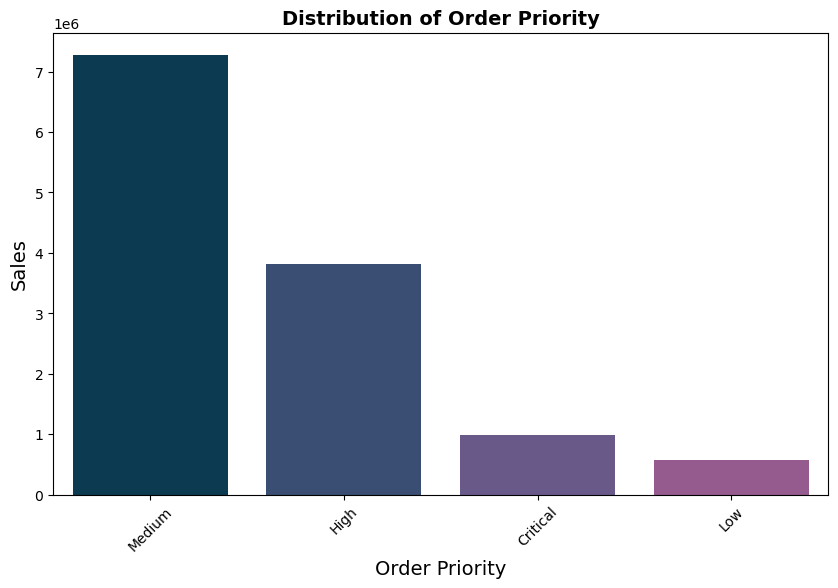

In [157]:
plt.figure(figsize=(10, 6))

sns.barplot(x="Order Priority", y="Sales", data=filtered_order, estimator=sum, ci=None, palette=["#003f5d", "#2f4b7c", "#665191", "#a05195"])
plt.title('Distribution of Order Priority',fontdict={'fontsize': 14,"fontweight":"bold"})
plt.xlabel('Order Priority', fontdict={'fontsize': 14})
plt.xticks(rotation=45)

plt.ylabel('Sales', fontdict={'fontsize': 14})
plt.show()

## Observation

Based on the graph and the calculation above, the "Medium" order priority has the highest sales, with a total of approximately 1,405,560.

### The average shipping cost to each region

In [164]:
filtered_region=data.groupby("Region")[["Shipping Cost"]].mean().sort_values(by="Shipping Cost", ascending=False)
filtered_region

,Shipping Cost
Region,
North Asia,40.646112
Central Asia,38.003003
Oceania,34.593780
Southeast Asia,29.937948
North,27.476299
Central,26.710494
East,25.542001
South,25.353509
West,23.887687


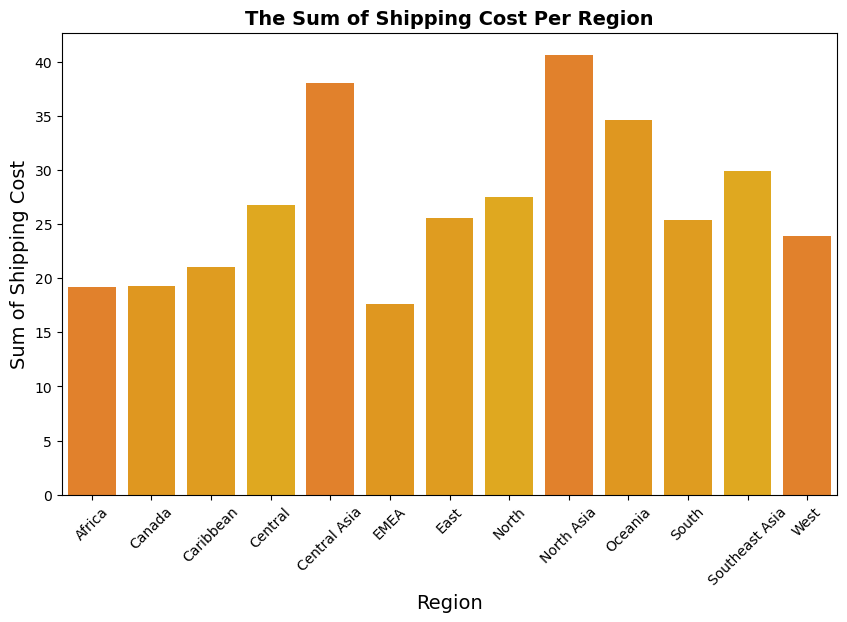

In [299]:
region_shipping_sum = data.groupby("Region")["Shipping Cost"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="Shipping Cost", data=region_shipping_sum, palette=["#ff7f0e", "#ff9f00", "#ffa600", "#ffb600"])
plt.title('The Sum of Shipping Cost Per Region', fontdict={'fontsize': 14, "fontweight": "bold"})
plt.xlabel('Region', fontdict={'fontsize': 14})
plt.ylabel('Sum of Shipping Cost', fontdict={'fontsize': 14})
plt.xticks(rotation=45)
plt.show()


###  Observations



* North Asia has the highest average shipping cost of $40.6

### Losses made

In [146]:
losses=data[data['Profit']<0][['Market', 'Profit', 'Category']]

In [147]:
losscat=data[data['Profit']<0][['Category', 'Profit']]

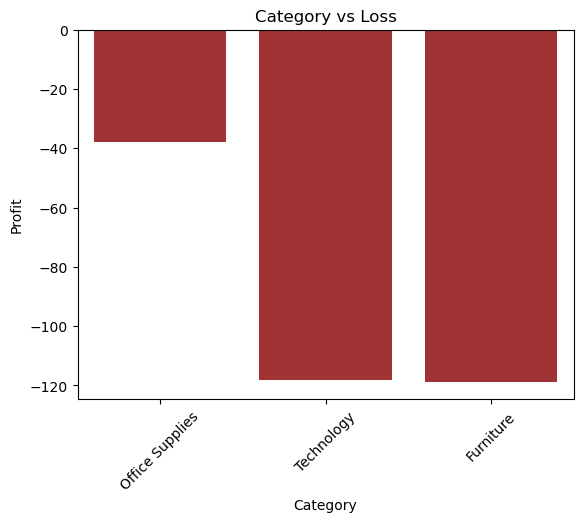

In [148]:
sns.barplot(x='Category', y='Profit', data=losses, color='firebrick', ci=None)


plt.title('Category vs Loss')
plt.ylabel('Profit')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

### Obsevation
Furniture makes the highest loss in the category section

Text(0.5, 0, '')

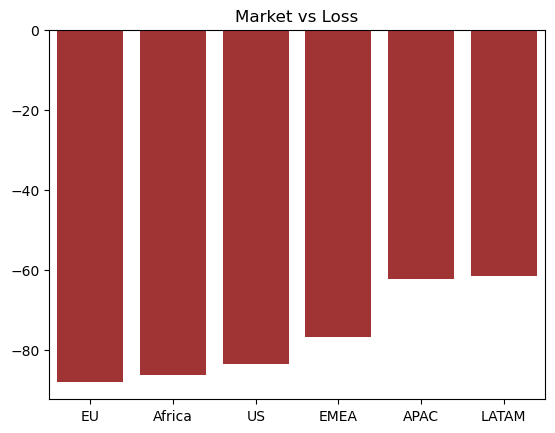

In [149]:
losorder= losses.groupby('Market')['Profit'].mean().sort_values().index

sns.barplot(x='Market',y='Profit', data=losses, order=losorder, color='firebrick', ci=None)
plt.title('Market vs Loss')
plt.ylabel('')
plt.xlabel('')

### Observation
The EU Market makes the most loss in all the markets

Text(0.5, 0, '')

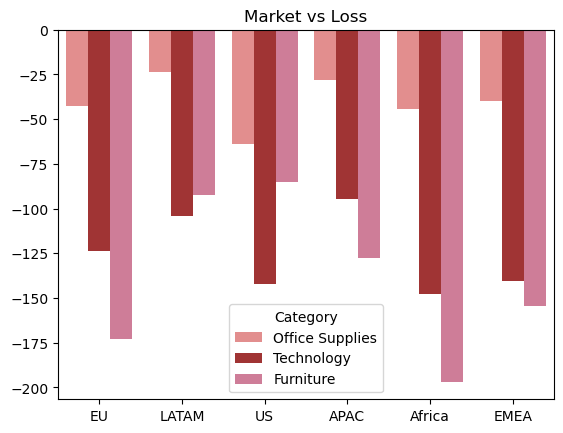

In [150]:
sns.barplot(x='Market',y='Profit', data=losses, hue='Category',palette=['lightcoral','firebrick','palevioletred'], ci=None)
plt.title('Market vs Loss')
plt.ylabel('')
plt.xlabel('')

### Obsevation
In all the categories Africa records the highest loss

In [158]:
X=data[['Unit Price','Shipping Cost']]
Y=data['Sales']
X.rename(columns={'Shipping Cost':'ShippingCost', 'Unit Price':'UnitPrice'}, inplace=True)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42)

X_train['Sales'] = Y_train
multi_reg = ols('Sales ~ UnitPrice *ShippingCost+0',data = X_train).fit()

multi_reg.params

UnitPrice                 2.117745
ShippingCost              3.248073
UnitPrice:ShippingCost    0.001762
dtype: float64

In [159]:
print(multi_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.820
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                          5.838e+04
Date:                Sun, 19 May 2024   Prob (F-statistic):                        0.00
Time:                        16:54:15   Log-Likelihood:                     -2.6380e+05
No. Observations:               38467   AIC:                                  5.276e+05
Df Residuals:                   38464   BIC:                                  5.276e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [160]:
multi_reg  = multi_reg.predict(X_test)

multi_reg = multi_reg.reset_index(drop = True)

Y_test = Y_test.reset_index(drop =True )


In [161]:
Y_test

0         641.400
1          50.580
2          61.710
3         396.576
4          16.440
           ...   
12818     328.640
12819     214.900
12820     185.010
12821      40.290
12822    1508.040
Name: Sales, Length: 12823, dtype: float64

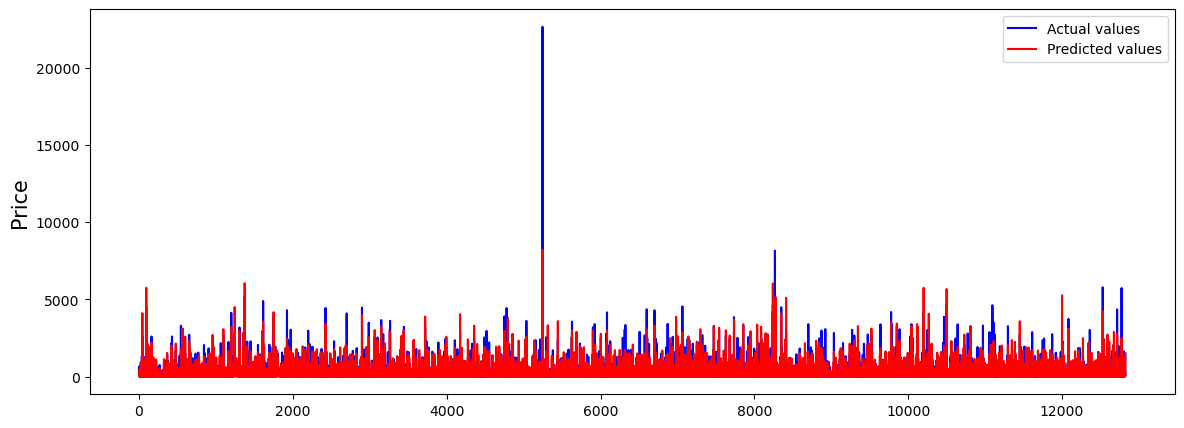

In [164]:
plt.figure(figsize=(14,5))
plt.plot(Y_test,color = 'blue',label='Actual values')
plt.plot(multi_reg,color = 'red',label='Predicted values')
plt.ylabel('Price',fontdict = {'fontweight':20,'fontsize':15})
plt.legend()
plt.show()

### Observation

The model has an R-squared value of approximately 0.82, indicating that around 82% of the variability in sales is explained by the predictor variables.
The coefficients of the model indicate the estimated effect of each predictor on sales:
For every one-unit increase in UnitPrice, sales are estimated to increase by approximately 2.12 units.
For every one-unit increase in ShippingCost, sales are estimated to increase by approximately 3.25 units.
The interaction term UnitPrice:ShippingCost suggests that the effect of UnitPrice on sales may depend on the value of ShippingCost, and vice versa.

### Products to be targeted to the different markets



In [167]:
data["Shipping interval"]=data["Shipping interval"].astype(str)

In [168]:

data['Shipping interval']=data["Shipping interval"].str.strip("days").astype(int)


correlation_sales = data["Shipping interval"].corr(data["Sales"])


correlation_profit = data["Shipping interval"].corr(data["Profit"])

print("Correlation between Interval and Sales:", correlation_sales)
print("Correlation between Interval and Profit:", correlation_profit)


Correlation between Interval and Sales: -0.004659709218983872
Correlation between Interval and Profit: 0.001744785246734459


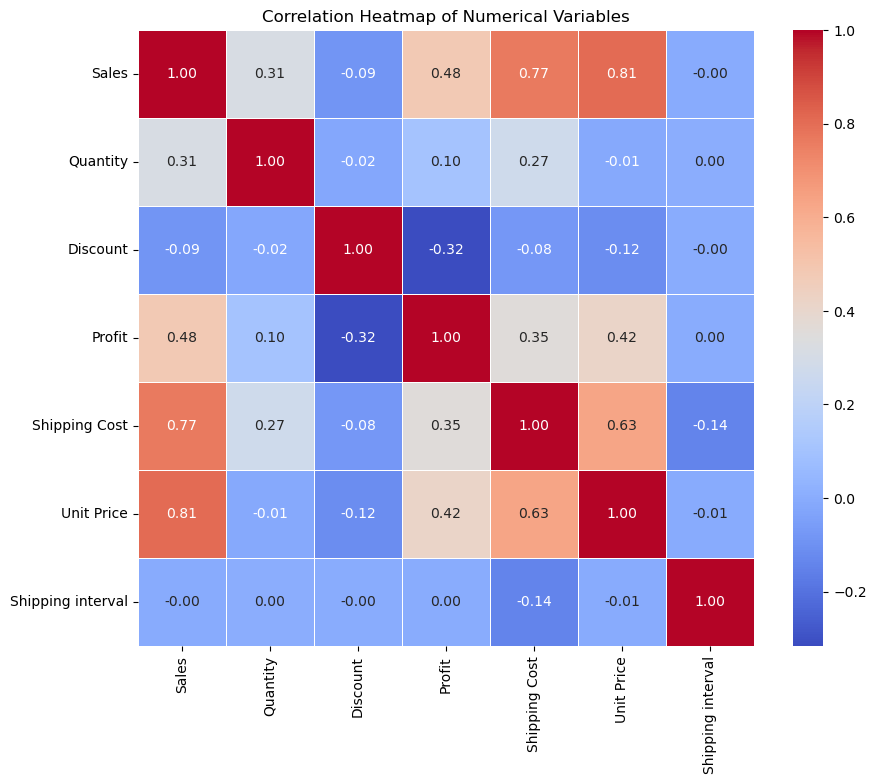

In [169]:

numerical_data = data.select_dtypes(include=['number'])
corr = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

### Observation
* The correlation between the Interval and Sales is -0.005 this suggests that there is virtually no linear relationship between the shipping interval     and sales. Thus as the interval for order date and shipping increases, sales might decrease very slightly, but the effect is so minimal it's likely negligible.




* The correlation between the Interval and Profit is also very close to 0, indicating almost no linear relationship between the shipping interval and profit. This implying that as the shipping interval increases, profit might also increase slightly.

## CONCLUSION
* Discounts: Since discounts are not given on products or are minimal, the variable doesn't have a significant effect on the other variables in the dataset. This suggests that discounts are not a significant factor influencing sales or profit.

* Profit: The profit is heavily influenced by the sales unit price and shipping cost. When the sales unit price and shipping cost increase, the profit also tends to increase. This indicates that focusing on maximizing sales unit price and managing shipping costs could lead to higher profits.

* Shipping Interval: The interval between the order date and shipping date does not have a significant effect on the amount of sales generated. Additionally, it does not appear to have a significant impact on the profitability of the orders. This suggests that customers may not be sensitive to the shipping time, or other factors might be more influential in their purchasing decisions.

## RECOMENDATION

* Since profit is influenced by the sales unit price, there should be more focus on strategies to increase the price of their products without compromising on customer satisfaction. This can be done through introduction of slightly better product quality and uniqueness, or implementing value-added services.

* Since discounts are not given on most of the product, i would recommend that they intoduce discounts on quantities. this can also boost the sales and eventually the profits.
